# A DATA ANALYSIS FOR MICROSOFT MOVIE STUDIO
## Goals:
    1. Prepare the provide data
    2. Do analysis on the data
    3. Generate insights 

In [203]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sqlite3
import string
import random

In [204]:
#1. opening bom.movie_gross file and creating a dataframe
bom_movie_gross = pd.read_csv('.data/bom.movie_gross.csv')

#2. opening rt.movie_info file and creating a dataframe
rt_movie_info = pd.read_csv('.data/rt.movie_info.tsv', sep = '\t', index_col=0)

#3. opening rt.reviews file and creating a dataframe
rt_reviews = pd.read_csv('.data/rt.reviews.tsv', encoding = 'unicode_escape', sep = '\t', index_col=0)

#4. opening tmdb.movies file and creating a dataframe
tmdb_movies = pd.read_csv('.data/tmdb.movies.csv', index_col=0)

#5. opening tn.movie_budgets file and creating a dataframe
tn_movie_budgets = pd.read_csv('.data/tn.movie_budgets.csv', index_col=0)

#6. opening imdb file and creating a dataframe
    #query the database and join the tables movie basics and movie ratings
conn = sqlite3.connect('.data/im.db')


#### Function for checking various information about a dataframe

In [205]:
def df_info(df):
    df_shape = df.shape
    missing_sum = df.isna().sum()
    names = df.columns
    info = df.info()
    print('\033[95m' + f'Column names: {names}' +  '\033[0m')
    print(f'Shape: {df_shape}')
    print(f'Df info: {info}')
    print('\033[94m' + 'Missing sum:' + '\033[0m')
    print('\033[94m' + f' {missing_sum}' + '\033[0m')
    return

### Joining movie basics table with movie ratings and movie akas tables

In [206]:
#joining tables and creating a dataframe
imdb = pd.read_sql('''SELECT *
                      FROM movie_basics
                      JOIN ( SELECT averagerating, numvotes, region, movie_id
                             FROM movie_ratings
                             JOIN movie_akas
                             USING(movie_id)
                           ) ratings
                       USING(movie_id)
''', conn)

#### cleaning the dataframe formed after joining the tables

In [207]:
imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,region
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,None
1,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,IN
2,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,IN
3,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,IN
4,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,IN
...,...,...,...,...,...,...,...,...,...
261801,tt9905462,Pengalila,Pengalila,2019,111.00,Drama,8.40,600,IN
261802,tt9905462,Pengalila,Pengalila,2019,111.00,Drama,8.40,600,IN
261803,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.00,Drama,8.40,365,None
261804,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.00,Drama,8.40,365,IN


In [208]:
#removing duplicated rows
imdb = imdb.drop_duplicates()

#removing null rows in region rows with the string none
imdb = imdb[(imdb['region'].notna()) & (imdb['region'] != 'None')]

#drop duplicated rows while merging the region values
imdb = imdb.groupby('movie_id', as_index=False).agg({'primary_title': 'first',
                                                  'original_title': 'first',
                                                  'start_year': 'first',
                                                  'runtime_minutes': 'first',
                                                  'genres': 'first',
                                                  'averagerating': 'first',
                                                  'numvotes': 'first',
                                                  'region': ', '.join})

imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,region
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,IN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43,"IN, XWW"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517,"AR, BR, DE, ES, FR, GB, IT, PL, PT, RU, US, VE"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.10,13,IN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119,"CL, PL, XWW"
...,...,...,...,...,...,...,...,...,...
69547,tt9899860,Watching This Movie Is a Crime,Didan in film jorm ast,2019,100.00,"Drama,Thriller",8.10,7,"IR, XWW"
69548,tt9899880,Columbus,Columbus,2018,85.00,Comedy,5.80,5,IR
69549,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,2018,87.00,"Comedy,Horror",9.20,5,DE
69550,tt9905462,Pengalila,Pengalila,2019,111.00,Drama,8.40,600,IN


In [209]:
#checking which columns have missing data
imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    6741
genres              637
averagerating         0
numvotes              0
region                0
dtype: int64

In [210]:
#checking missing percentage
missing_percentage_genres = imdb.genres.isna().sum() * 100 / len(imdb.genres)
missing_percentage_minutes = imdb.runtime_minutes.isna().sum() * 100 / len(imdb.runtime_minutes)
print('Missing data for genres', format(missing_percentage_genres, '.2f'))
print('Missing data for runtime', format(missing_percentage_minutes, '.2f'))

Missing data for genres 0.92
Missing data for runtime 9.69


In [211]:
#removing all rows in genre and runtime minutes as their percentage is negligible
imdb['genres'] = imdb.genres.dropna()
imdb['runtime_minutes'] = imdb.runtime_minutes.dropna()
imdb = imdb[imdb['runtime_minutes'] <= 200]
imdb = imdb[imdb['runtime_minutes'] >= 59]
imdb = imdb.dropna(subset=['genres', 'runtime_minutes'])
imdb = imdb.drop('movie_id', axis=1)

#dropping a column
imdb = imdb.drop('primary_title', axis=1)
imdb

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,region
0,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,IN
1,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43,"IN, XWW"
2,The Other Side of the Wind,2018,122.00,Drama,6.90,4517,"AR, BR, DE, ES, FR, GB, IT, PL, PT, RU, US, VE"
4,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119,"CL, PL, XWW"
6,Joe Finds Grace,2017,83.00,"Adventure,Animation,Comedy",8.10,263,CA
...,...,...,...,...,...,...,...
69547,Didan in film jorm ast,2019,100.00,"Drama,Thriller",8.10,7,"IR, XWW"
69548,Columbus,2018,85.00,Comedy,5.80,5,IR
69549,BADMEN with a good behavior,2018,87.00,"Comedy,Horror",9.20,5,DE
69550,Pengalila,2019,111.00,Drama,8.40,600,IN


In [212]:
imdb =imdb.rename(columns={'original_title': 'movie'})

In [213]:
#confirming if there are missing values
imdb.isna().sum()

movie              0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
region             0
dtype: int64

In [214]:
df_info(imdb)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58998 entries, 0 to 69551
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie            58998 non-null  object 
 1   start_year       58998 non-null  int64  
 2   runtime_minutes  58998 non-null  float64
 3   genres           58998 non-null  object 
 4   averagerating    58998 non-null  float64
 5   numvotes         58998 non-null  int64  
 6   region           58998 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 3.6+ MB
Column names: Index(['movie', 'start_year', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'region'],
      dtype='object')
Shape: (58998, 7)
Df info: None
Missing sum:
 movie              0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
region             0
dtype: int64


### Merging and cleaning bom movie gross and tn mov ie budgets data

In [215]:
#viewing information about the dataframe
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [216]:
#viewing information about the dataframe
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [217]:
#renaming a column in the dataframe
bom_movie_gross = bom_movie_gross.rename(columns={'title': 'movie'})

In [218]:
#viewing the dataframe
tn_movie_budgets.head(4)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"


In [219]:
#merging bom gross and tn budgets
bom_and_tn = pd.merge(bom_movie_gross, tn_movie_budgets, on='movie', how='outer')

In [220]:
bom_and_tn.tail()

,movie,studio,domestic_gross_x,foreign_gross,year,release_date,production_budget,domestic_gross_y,worldwide_gross
7926,Red 11,NaN,nan,NaN,nan,"Dec 31, 2018","$7,000",$0,$0
7927,Following,NaN,nan,NaN,nan,"Apr 2, 1999","$6,000","$48,482","$240,495"
7928,Return to the Land of Wonders,NaN,nan,NaN,nan,"Jul 13, 2005","$5,000","$1,338","$1,338"
7929,A Plague So Pleasant,NaN,nan,NaN,nan,"Sep 29, 2015","$1,400",$0,$0
7930,My Date With Drew,NaN,nan,NaN,nan,"Aug 5, 2005","$1,100","$181,041","$181,041"


In [221]:
#information about the merged dataframe
bom_and_tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7931 entries, 0 to 7930
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              7931 non-null   object 
 1   studio             3391 non-null   object 
 2   domestic_gross_x   3368 non-null   float64
 3   foreign_gross      2044 non-null   object 
 4   year               3396 non-null   float64
 5   release_date       5782 non-null   object 
 6   production_budget  5782 non-null   object 
 7   domestic_gross_y   5782 non-null   object 
 8   worldwide_gross    5782 non-null   object 
dtypes: float64(2), object(7)
memory usage: 619.6+ KB


In [222]:
bom_and_tn.isna().sum()

movie                   0
studio               4540
domestic_gross_x     4563
foreign_gross        5887
year                 4535
release_date         2149
production_budget    2149
domestic_gross_y     2149
worldwide_gross      2149
dtype: int64

In [223]:
#removing dollar signs and commas in this columns
bom_and_tn['production_budget'] = bom_and_tn['production_budget'].str.replace('[$,]', '').astype(float)
bom_and_tn['domestic_gross_y'] = bom_and_tn['domestic_gross_y'].str.replace('[$,]', '').astype(float)
bom_and_tn['worldwide_gross'] = bom_and_tn['worldwide_gross'].str.replace('[$,]', '').astype(float)

# fill missing values in 'domestic gross y' column with values from 'domestic gross x' column
bom_and_tn['domestic_gross_y'] = bom_and_tn['domestic_gross_y'].fillna(bom_and_tn['domestic_gross_x'])


In [224]:
bom_and_tn.tail()

,movie,studio,domestic_gross_x,foreign_gross,year,release_date,production_budget,domestic_gross_y,worldwide_gross
7926,Red 11,NaN,nan,NaN,nan,"Dec 31, 2018",7000.00,0.00,0.00
7927,Following,NaN,nan,NaN,nan,"Apr 2, 1999",6000.00,48482.00,240495.00
7928,Return to the Land of Wonders,NaN,nan,NaN,nan,"Jul 13, 2005",5000.00,1338.00,1338.00
7929,A Plague So Pleasant,NaN,nan,NaN,nan,"Sep 29, 2015",1400.00,0.00,0.00
7930,My Date With Drew,NaN,nan,NaN,nan,"Aug 5, 2005",1100.00,181041.00,181041.00


In [225]:
#changing to datetime data type and keeping the year only
bom_and_tn['release_date'] = pd.to_datetime(bom_and_tn['release_date']).dt.strftime('%Y')

In [226]:
#replacing nan with year from the column release date
bom_and_tn['year'] = bom_and_tn['year'].fillna(bom_and_tn['release_date'])

In [227]:
bom_and_tn.tail()

,movie,studio,domestic_gross_x,foreign_gross,year,release_date,production_budget,domestic_gross_y,worldwide_gross
7926,Red 11,NaN,nan,NaN,2018,2018,7000.00,0.00,0.00
7927,Following,NaN,nan,NaN,1999,1999,6000.00,48482.00,240495.00
7928,Return to the Land of Wonders,NaN,nan,NaN,2005,2005,5000.00,1338.00,1338.00
7929,A Plague So Pleasant,NaN,nan,NaN,2015,2015,1400.00,0.00,0.00
7930,My Date With Drew,NaN,nan,NaN,2005,2005,1100.00,181041.00,181041.00


In [228]:
bom_and_tn.studio.value_counts().head(10)

IFC      166
Uni.     149
WB       141
Magn.    137
Fox      137
SPC      123
Sony     111
BV       106
LGF      103
Par.     102
Name: studio, dtype: int64

In [229]:
missing_percentage_studio = bom_and_tn['domestic_gross_y'].isna().sum() * 100 / len(bom_and_tn.domestic_gross_y)
missing_percentage_studio

0.3278275122935317

In [230]:
bom_and_tn["studio"] = np.where(bom_and_tn["studio"].isna(),
                           pd.Series([random.choice(["IFC", "Uni.", "WB", "Magn", "Fox", "SPC", "Sony", "BV", "LGF", "Par."])
                           for i in range(len(bom_and_tn))]),
                           bom_and_tn["studio"])

In [231]:
#removing scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [232]:
#removing the columns not needed
bom_and_tn = bom_and_tn.drop(columns=[ 'domestic_gross_x', 'release_date', 'foreign_gross'])

In [233]:
#renaming the column domestic_gross_y to domestic_gross
bom_and_tn =bom_and_tn.rename(columns={'domestic_gross_y': 'domestic_gross'})

#changing a column data typeJOIN 'Order'
bom_and_tn

,movie,studio,year,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,2010.00,200000000.00,415004880.00,1068879522.00
1,Alice in Wonderland (2010),BV,2010.00,nan,334200000.00,nan
2,Harry Potter and the Deathly Hallows Part 1,WB,2010.00,nan,296000000.00,nan
3,Inception,WB,2010.00,160000000.00,292576195.00,835524642.00
4,Shrek Forever After,P/DW,2010.00,165000000.00,238736787.00,756244673.00
...,...,...,...,...,...,...
7926,Red 11,BV,2018,7000.00,0.00,0.00
7927,Following,Magn,1999,6000.00,48482.00,240495.00
7928,Return to the Land of Wonders,LGF,2005,5000.00,1338.00,1338.00
7929,A Plague So Pleasant,LGF,2015,1400.00,0.00,0.00


In [234]:
#creating a new column foreign gross
bom_and_tn['foreign_gross'] = (bom_and_tn['worldwide_gross'] - bom_and_tn['domestic_gross'])

In [235]:
bom_and_tn.tail()

,movie,studio,year,production_budget,domestic_gross,worldwide_gross,foreign_gross
7926,Red 11,BV,2018,7000.00,0.00,0.00,0.00
7927,Following,Magn,1999,6000.00,48482.00,240495.00,192013.00
7928,Return to the Land of Wonders,LGF,2005,5000.00,1338.00,1338.00,0.00
7929,A Plague So Pleasant,LGF,2015,1400.00,0.00,0.00,0.00
7930,My Date With Drew,LGF,2005,1100.00,181041.00,181041.00,0.00


In [236]:
bom_and_tn.isna().sum()

movie                   0
studio                  0
year                    0
production_budget    2149
domestic_gross         26
worldwide_gross      2149
foreign_gross        2149
dtype: int64

In [237]:
#calculating the percentage of NaN in domestic gross
percent_nan = bom_and_tn['domestic_gross'].isna().sum() / len(bom_and_tn.domestic_gross) * 100
percent_nan

0.3278275122935317

In [238]:
percent_nan_ww = (bom_and_tn['worldwide_gross'].isna().sum()) / len(bom_and_tn.worldwide_gross) * 100
percent_nan_ww

27.09620476610768

In [239]:
percent_nan_ww = (bom_and_tn['foreign_gross'].isna().sum()) / len(bom_and_tn.foreign_gross) * 100
percent_nan_ww

27.09620476610768

In [240]:
bom_and_tn = bom_and_tn.dropna(subset=['domestic_gross', 'production_budget', 'worldwide_gross'])

In [241]:
bom_and_tn

,movie,studio,year,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,Toy Story 3,BV,2010.00,200000000.00,415004880.00,1068879522.00,653874642.00
3,Inception,WB,2010.00,160000000.00,292576195.00,835524642.00,542948447.00
4,Shrek Forever After,P/DW,2010.00,165000000.00,238736787.00,756244673.00,517507886.00
5,The Twilight Saga: Eclipse,Sum.,2010.00,68000000.00,300531751.00,706102828.00,405571077.00
6,Iron Man 2,Par.,2010.00,170000000.00,312433331.00,621156389.00,308723058.00
...,...,...,...,...,...,...,...
7926,Red 11,BV,2018,7000.00,0.00,0.00,0.00
7927,Following,Magn,1999,6000.00,48482.00,240495.00,192013.00
7928,Return to the Land of Wonders,LGF,2005,5000.00,1338.00,1338.00,0.00
7929,A Plague So Pleasant,LGF,2015,1400.00,0.00,0.00,0.00


In [242]:
bom_and_tn.isna().sum()

movie                0
studio               0
year                 0
production_budget    0
domestic_gross       0
worldwide_gross      0
foreign_gross        0
dtype: int64

In [243]:
imdb

,movie,start_year,runtime_minutes,genres,averagerating,numvotes,region
0,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,IN
1,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43,"IN, XWW"
2,The Other Side of the Wind,2018,122.00,Drama,6.90,4517,"AR, BR, DE, ES, FR, GB, IT, PL, PT, RU, US, VE"
4,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119,"CL, PL, XWW"
6,Joe Finds Grace,2017,83.00,"Adventure,Animation,Comedy",8.10,263,CA
...,...,...,...,...,...,...,...
69547,Didan in film jorm ast,2019,100.00,"Drama,Thriller",8.10,7,"IR, XWW"
69548,Columbus,2018,85.00,Comedy,5.80,5,IR
69549,BADMEN with a good behavior,2018,87.00,"Comedy,Horror",9.20,5,DE
69550,Pengalila,2019,111.00,Drama,8.40,600,IN


In [244]:
bom_and_tn.head(5)

,movie,studio,year,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,Toy Story 3,BV,2010.00,200000000.00,415004880.00,1068879522.00,653874642.00
3,Inception,WB,2010.00,160000000.00,292576195.00,835524642.00,542948447.00
4,Shrek Forever After,P/DW,2010.00,165000000.00,238736787.00,756244673.00,517507886.00
5,The Twilight Saga: Eclipse,Sum.,2010.00,68000000.00,300531751.00,706102828.00,405571077.00
6,Iron Man 2,Par.,2010.00,170000000.00,312433331.00,621156389.00,308723058.00


In [245]:
#merging bom gross and tn budgets
imdb_n_bom = pd.merge(bom_and_tn, imdb, on='movie', how='inner')

In [246]:
imdb_n_bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 0 to 2445
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2446 non-null   object 
 1   studio             2446 non-null   object 
 2   year               2446 non-null   object 
 3   production_budget  2446 non-null   float64
 4   domestic_gross     2446 non-null   float64
 5   worldwide_gross    2446 non-null   float64
 6   foreign_gross      2446 non-null   float64
 7   start_year         2446 non-null   int64  
 8   runtime_minutes    2446 non-null   float64
 9   genres             2446 non-null   object 
 10  averagerating      2446 non-null   float64
 11  numvotes           2446 non-null   int64  
 12  region             2446 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 267.5+ KB


In [247]:
imdb.head(5)

,movie,start_year,runtime_minutes,genres,averagerating,numvotes,region
0,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,IN
1,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43,"IN, XWW"
2,The Other Side of the Wind,2018,122.00,Drama,6.90,4517,"AR, BR, DE, ES, FR, GB, IT, PL, PT, RU, US, VE"
4,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119,"CL, PL, XWW"
6,Joe Finds Grace,2017,83.00,"Adventure,Animation,Comedy",8.10,263,CA


## Visualization

### Visualization of imdb dataframe

In [248]:
imdb.head(5)

,movie,start_year,runtime_minutes,genres,averagerating,numvotes,region
0,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,IN
1,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43,"IN, XWW"
2,The Other Side of the Wind,2018,122.00,Drama,6.90,4517,"AR, BR, DE, ES, FR, GB, IT, PL, PT, RU, US, VE"
4,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119,"CL, PL, XWW"
6,Joe Finds Grace,2017,83.00,"Adventure,Animation,Comedy",8.10,263,CA


#### What are the top rated genres?

In [249]:
#creating a new dataframe with only the columns needed for this question.
genre_rating = imdb[['genres', 'averagerating']]


In [250]:
genre_rating = genre_rating.groupby('genres')['averagerating'].mean()
genre_rating = genre_rating.reset_index(name='averagerating')
genre_rating = genre_rating[genre_rating['averagerating'] >= 7.6]


In [251]:
genre_rating

,genres,averagerating
14,"Action,Adventure,Musical",8.70
63,"Action,Crime,Music",7.90
72,"Action,Documentary,Drama",7.74
73,"Action,Documentary,Family",8.08
77,"Action,Documentary,Sport",7.78
...,...,...
785,"Fantasy,History,Romance",7.90
794,"Fantasy,Music",8.10
808,Game-Show,9.00
850,"Music,Musical,Romance",8.40


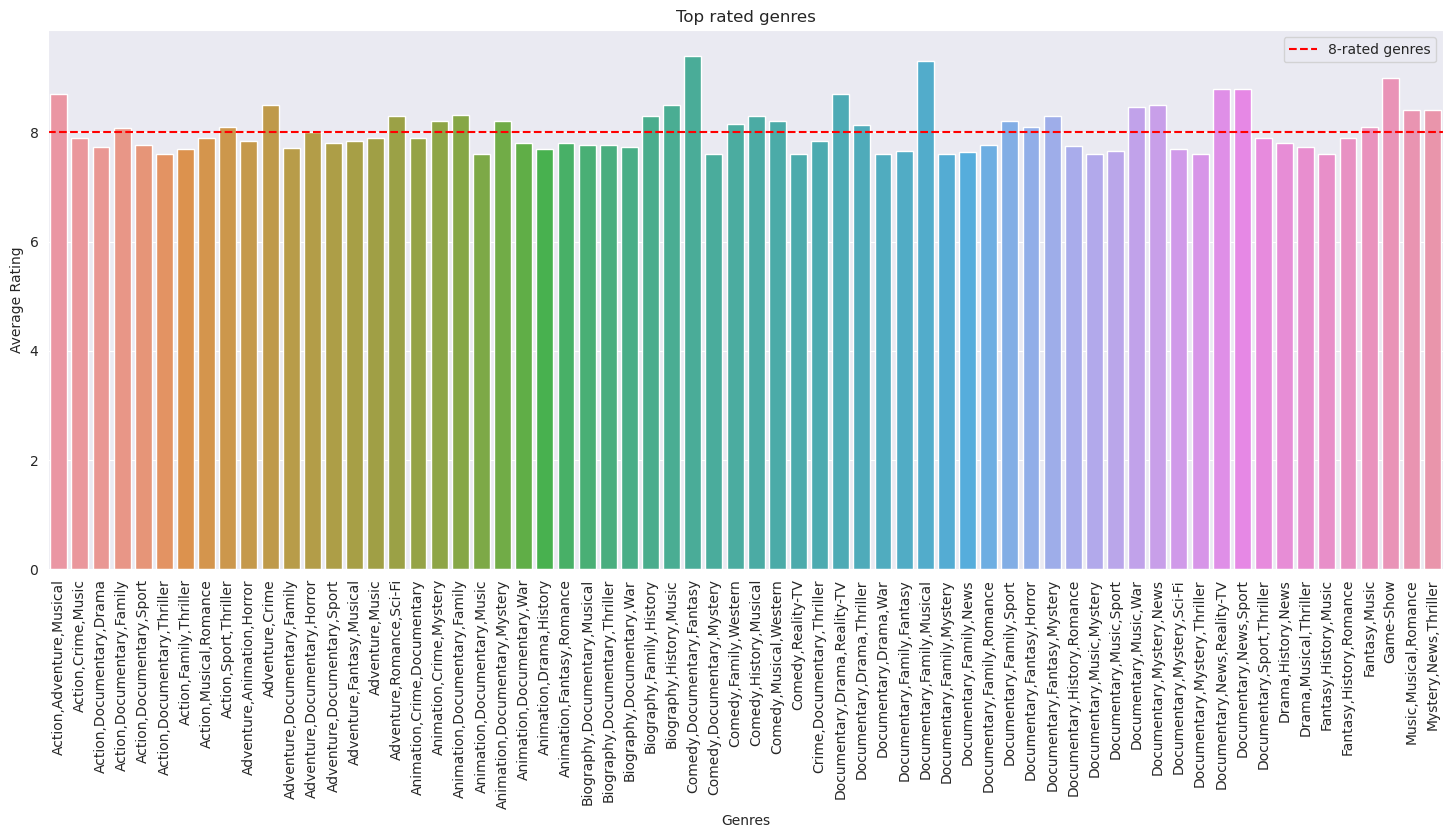

In [252]:
#bar graph of top rated genres
big = (18,7)
fig, ax = plt.subplots(figsize = big )
sns.barplot(x = 'genres', y = 'averagerating',  data = genre_rating)
plt.axhline(y=8, color='r', linestyle='--', label = '8-rated genres')
plt.xticks(rotation = 90 )
plt.legend()
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Top rated genres')
plt.show()

From the data provided, there are many ratings and for this plot we needed the highest rated movies. I therefore trimmed the data to contain
only ratings that were above a 7.6 rating.
From the available data, movies in Comedy, Documentary, Fantasy, Musical, Family, Game-show, Action, Adventure, Crime, War and Reality-TV seem to be the best performing genres.
This are just a few of the top rated genre as there are many.

#### What is the trend of movie length over the years?

In [253]:
#new dataframe with required values
run_years = imdb[['start_year', 'runtime_minutes']]
run_years = run_years.groupby('start_year')['runtime_minutes'].mean()
run_years = run_years.reset_index(name='minutes')
run_years

,start_year,minutes
0,2010,95.03
1,2011,94.58
2,2012,94.28
3,2013,94.84
4,2014,95.43
5,2015,95.32
6,2016,95.98
7,2017,96.55
8,2018,98.02
9,2019,101.38


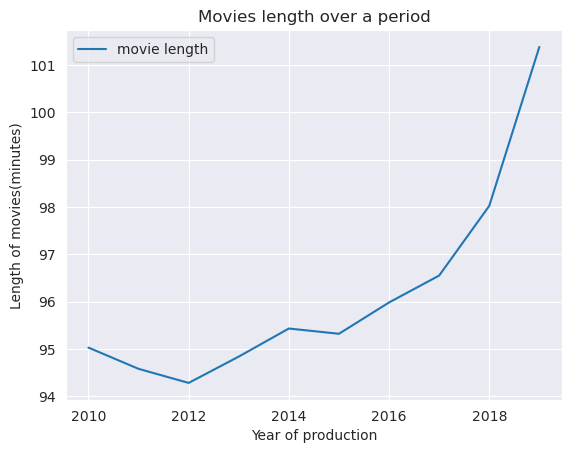

In [254]:
#plot showing movie runtime over the years
sns.lineplot(data=run_years, x='start_year', y='minutes', label = 'movie length')
plt.ylabel('Length of movies(minutes)')
plt.xlabel('Year of production')
plt.title('Movies length over a period')
plt.show()

It seems that the movie length is increasing over the years. This may due to many factors but it is evident that longer movies are being produced as the years go by

#### Which is the most common runtime?

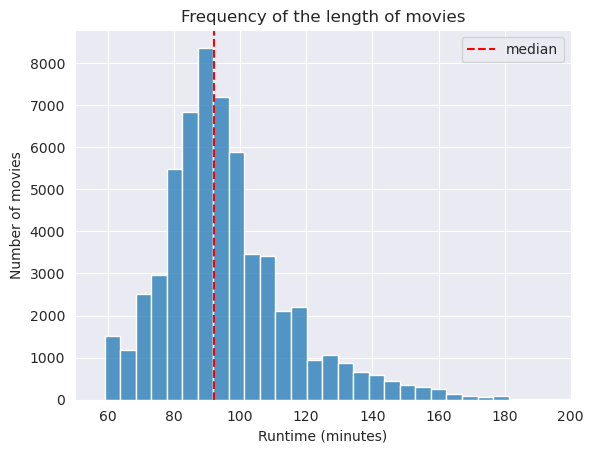

In [255]:
#histogram for most common runtime
sns.histplot(data=imdb, x='runtime_minutes', bins = 30)
sns.set_style('darkgrid')
plt.axvline(imdb['runtime_minutes'].median(), color='red', linestyle='--', label = 'median')
plt.title('Frequency of the length of movies')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of movies')
plt.legend()
plt.xlim(50, 200)
plt.show()

From the visualization, it appears movies with a runtime of arounf 90 minutes are very popular. This means that most movies are between 1 hour to 1 hour 30 minutes.

#### How does the runtime influence rating?

In [256]:
#dataframe for runtime and average rating
runtime_vs_rating = imdb[['runtime_minutes', 'averagerating', 'movie']]

In [257]:
runtime_vs_rating = runtime_vs_rating.groupby('runtime_minutes')['averagerating'].mean()
runtime_vs_rating = runtime_vs_rating.reset_index(name='averagerating')


In [258]:
runtime_vs_rating

,runtime_minutes,averagerating
0,59.00,7.01
1,60.00,6.98
2,61.00,6.83
3,62.00,6.82
4,63.00,6.68
...,...,...
136,196.00,8.20
137,197.00,6.93
138,198.00,7.43
139,199.00,7.10


In [259]:
#correlation between average rating and movie length
corr = runtime_vs_rating['runtime_minutes'].corr(runtime_vs_rating['averagerating'])

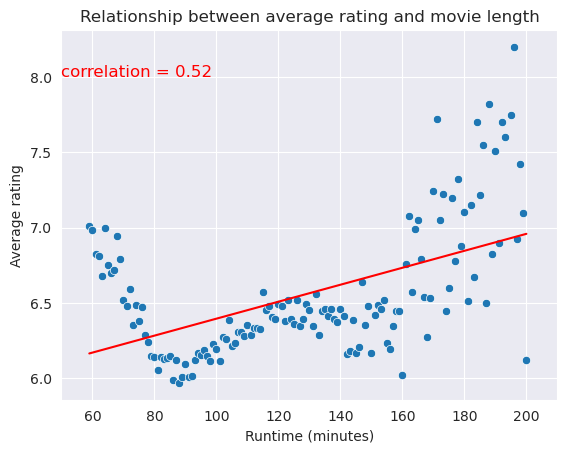

In [260]:
#plot showing runtime vs average rating
sns.scatterplot(data=runtime_vs_rating, x='runtime_minutes', y='averagerating')
plt.text(50, 8, f"correlation = {corr:.2f}", fontsize=12, color='red')
sns.set_style('darkgrid')
x = runtime_vs_rating['runtime_minutes']
y = runtime_vs_rating['averagerating']
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
plt.title('Relationship between average rating and movie length')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average rating')
plt.xlim(50, 210)
plt.show()

It seems that as runtime increases so does the average rating. The correlation indicates a moderate positive relationship between the two. This means that as runtime increases, the average rating tends to increase and vice versa which is further visible in the scatter plot
There could be other factors affecting this.

### Visualization of bom and tn dataframe

In [261]:
bom_and_tn.head(5)

,movie,studio,year,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,Toy Story 3,BV,2010.00,200000000.00,415004880.00,1068879522.00,653874642.00
3,Inception,WB,2010.00,160000000.00,292576195.00,835524642.00,542948447.00
4,Shrek Forever After,P/DW,2010.00,165000000.00,238736787.00,756244673.00,517507886.00
5,The Twilight Saga: Eclipse,Sum.,2010.00,68000000.00,300531751.00,706102828.00,405571077.00
6,Iron Man 2,Par.,2010.00,170000000.00,312433331.00,621156389.00,308723058.00


#### What is the relationship between production budget and worldwide gross?

In [262]:
#dataframe with specific data for this question
yearly_stats = bom_and_tn[['year', 'worldwide_gross', 'production_budget']].copy()
yearly_stats['year'] = yearly_stats['year'].astype(str).str[:4]

yearly_stats['year'] = pd.to_datetime(yearly_stats['year']).dt.strftime('%Y')
yearly_stats = yearly_stats[yearly_stats['worldwide_gross'] >= 1000000]
yearly_stats = yearly_stats.reset_index(drop=True)


In [263]:
yearly_stats = yearly_stats.groupby('year')[['worldwide_gross', 'production_budget']].mean()

yearly_stats

,worldwide_gross,production_budget
year,,
1915,11000000.00,110000.00
1916,8000000.00,200000.00
1920,3000000.00,100000.00
1925,15500000.00,2072500.00
1929,4358000.00,379000.00
...,...,...
2015,155188302.59,45489502.76
2016,153508731.00,47597967.91
2017,185497901.75,53530823.53


In [264]:
corr_yr = yearly_stats['production_budget'].corr(yearly_stats['worldwide_gross'])
corr_yr

0.7395243968583006

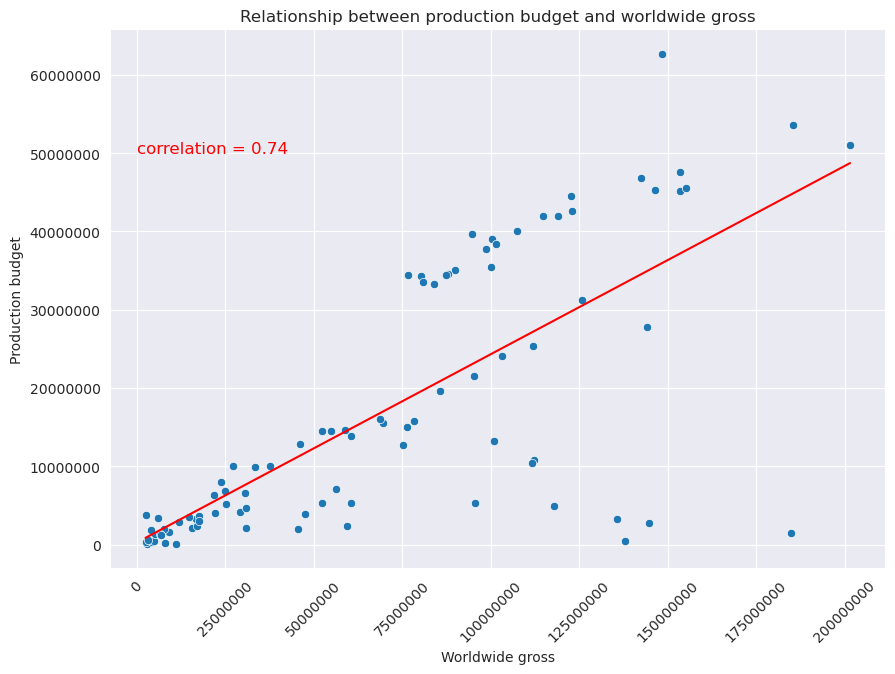

In [265]:
#plot illustrating relationship between production budget and worldwide gross
big = (10,7)
fig, ax = plt.subplots(figsize = big )

sns.scatterplot(data=yearly_stats, y='production_budget', x='worldwide_gross')
plt.text(8, (5 * 1e7), f"correlation = {corr_yr:.2f}", fontsize=12, color='red')
sns.set_style('darkgrid')
y = yearly_stats['production_budget']
x = yearly_stats['worldwide_gross']
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
plt.title('Relationship between production budget and worldwide gross')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Worldwide gross')
plt.ylabel('Production budget')
plt.xticks(rotation = 45 )

plt.show()

From the above visualization, there is a notable trend where when the production budget is increased, the worldwide gross also increases. The correlation also supports this as it is a positive correlation 0f 0.73 which means that there is a high likelihood of worldwide gross increasing when production budget is increased. This however does not mean production budget is the only thing that influences production budget.

#### How has time influenced production budget and worldwide gross?

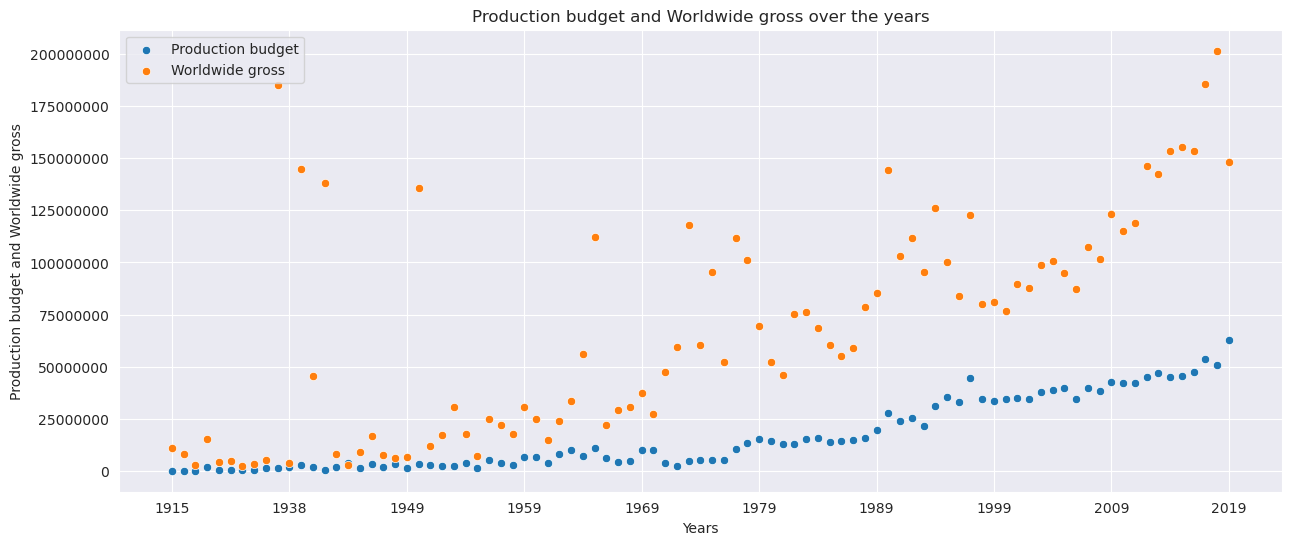

In [266]:
#plot illustrating relationship between production budget and worldwide gross over the years
fig, ax = plt.subplots(figsize = (15,6))
sns.scatterplot(data=yearly_stats, x='year', y='production_budget', label = 'Production budget')
sns.scatterplot(data=yearly_stats, x='year', y='worldwide_gross', label = 'Worldwide gross')
plt.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Years')
ax.set_ylabel('Production budget and Worldwide gross')
ax.set_title('Production budget and Worldwide gross over the years')
plt.legend()
plt.xticks(np.arange(0, 100, 10))

plt.show()

Here we can summarise that over the years, the movie industry has continued injecting more money into production. The worldwide gross has also risen over the years which is reflected in the data. This however does not mean there are no other factors influencing this.

#### Visualization of both dataframes combined

In [267]:
imdb_n_bom.head(5)

,movie,studio,year,production_budget,domestic_gross,worldwide_gross,foreign_gross,start_year,runtime_minutes,genres,averagerating,numvotes,region
0,Toy Story 3,BV,2010.00,200000000.00,415004880.00,1068879522.00,653874642.00,2010,103.00,"Adventure,Animation,Comedy",8.30,682218,"AR, BG, BR, CA, CN, CZ, DK, EE, ES, FR, GE, GR..."
1,Inception,WB,2010.00,160000000.00,292576195.00,835524642.00,542948447.00,2010,148.00,"Action,Adventure,Sci-Fi",8.80,1841066,"AR, BE, BG, BR, CA, CL, CO, CZ, DE, DK, EE, ES..."
2,Shrek Forever After,P/DW,2010.00,165000000.00,238736787.00,756244673.00,517507886.00,2010,93.00,"Adventure,Animation,Comedy",6.30,167532,"AR, BE, BG, BR, CA, CM, CZ, DE, DK, EE, ES, FI..."
3,The Twilight Saga: Eclipse,Sum.,2010.00,68000000.00,300531751.00,706102828.00,405571077.00,2010,124.00,"Adventure,Drama,Fantasy",5.00,211733,"AL, AR, BG, BR, CA, CZ, DE, DK, EE, ES, FI, FR..."
4,Iron Man 2,Par.,2010.00,170000000.00,312433331.00,621156389.00,308723058.00,2010,124.00,"Action,Adventure,Sci-Fi",7.00,657690,"AR, BG, BR, CA, CZ, DK, EE, ES, FR, GB, GE, GR..."


#### Does studio budget affect movie gross?

In [268]:
studio_money = imdb_n_bom[['studio', 'worldwide_gross', 'production_budget']]

In [269]:
studio_money = studio_money.groupby('studio')[['worldwide_gross', 'production_budget']].mean()
studio_money

,worldwide_gross,production_budget
studio,,
A24,17977546.15,6980000.00
ALP,2923959.00,26000000.00
ATO,2272186.00,12500000.00
Affirm,15735746.00,3500000.00
Alc,161097.00,10000000.00
...,...,...
WB,150359391.89,54993986.60
WB (NL),216790496.34,55697560.98
WHE,382946.00,7000000.00


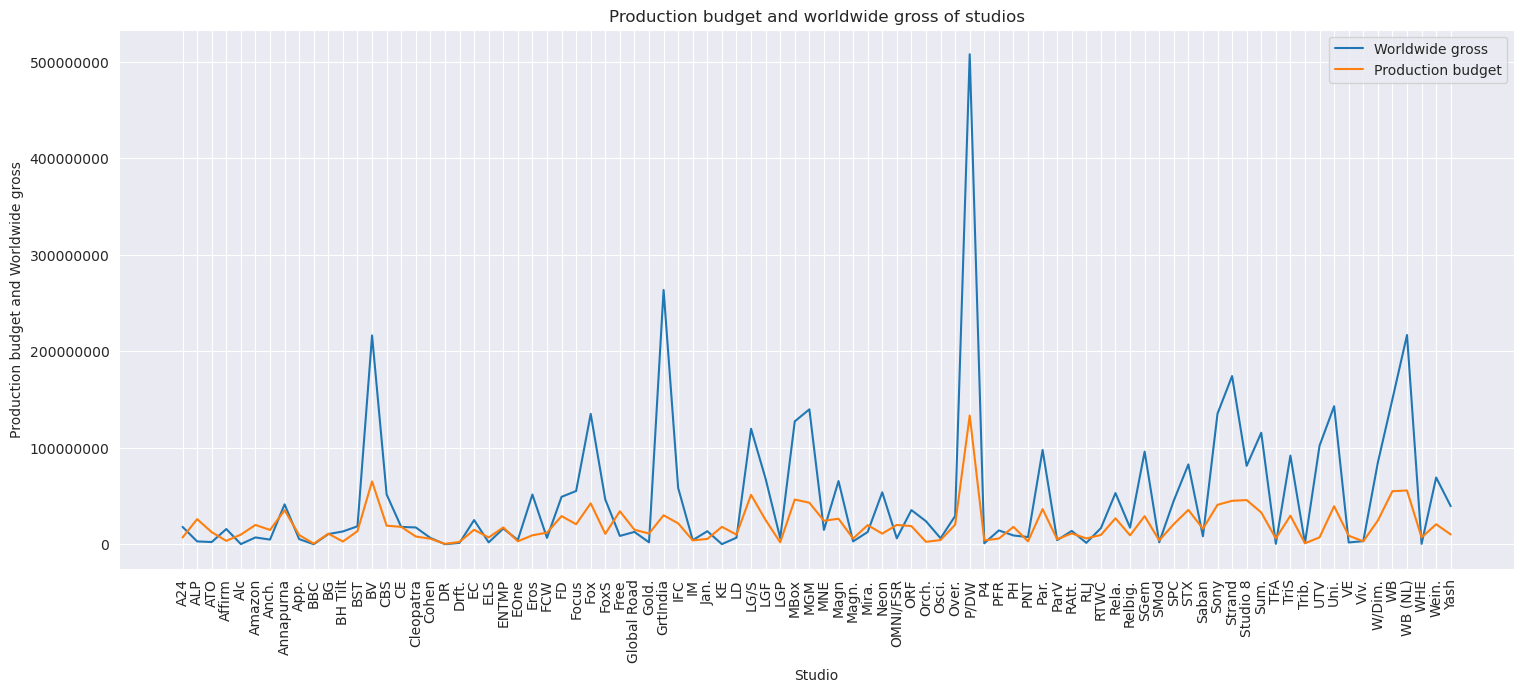

In [270]:
fig, ax = plt.subplots(figsize = (18,7))
sns.lineplot(data=studio_money, x= 'studio', y='worldwide_gross', label = 'Worldwide gross')
sns.lineplot(data=studio_money, x= 'studio', y='production_budget', label = 'Production budget')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 90)
ax.set_xlabel('Studio')
ax.set_ylabel('Production budget and Worldwide gross')
ax.set_title('Production budget and worldwide gross of studios')
plt.show()

The various studios have different budgets as is evident in the plot. It seems that a higher budget does play a role on the worlwide gross of the studio. This however is not the case in all the studios. This can be influenced by factors such as movie reception in the market.